 Step 1- Read Kaggle Credit Card .CSV File Data into Dataframe

  Step 2- Review, Explore and Analyze Credit Card Data  

 2A- Print Dataframe Header Data 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300

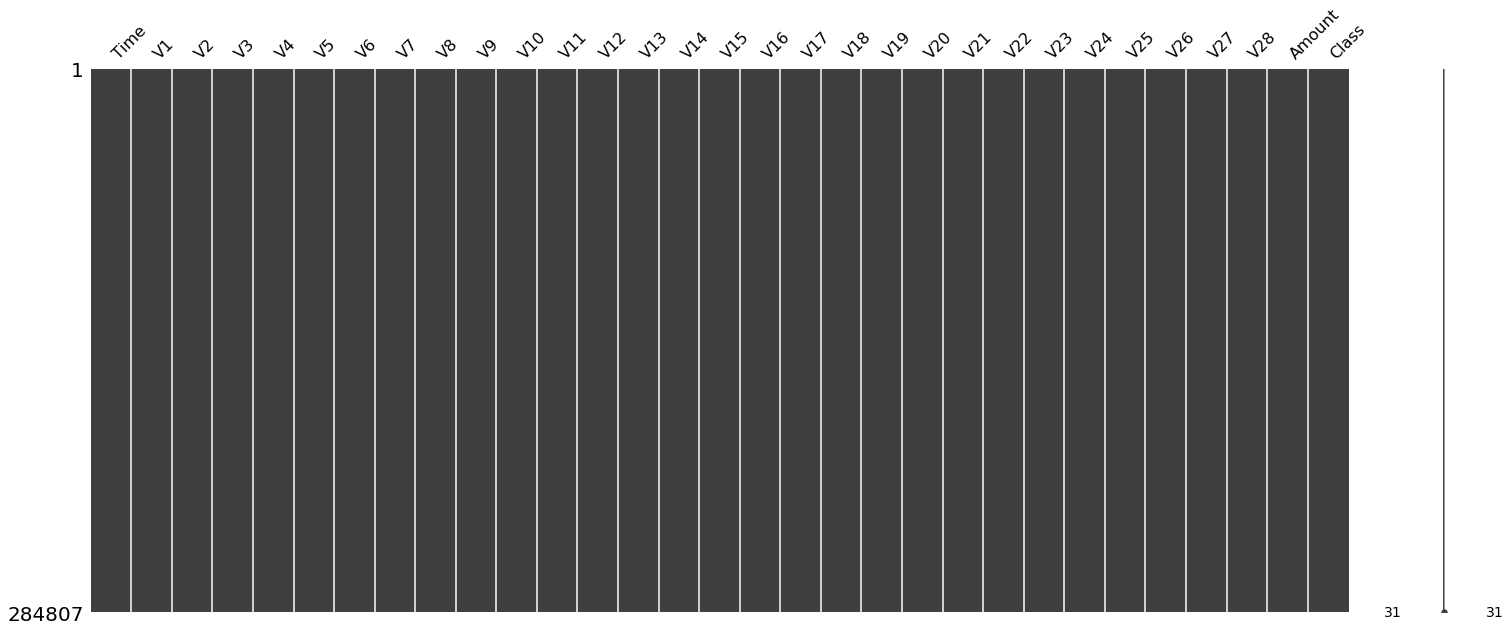



 3B- Note: Fraud Transactions are centered around Lower Amount Transactions under 3000 



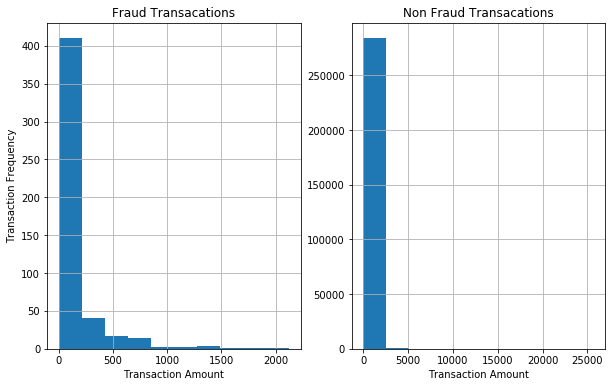

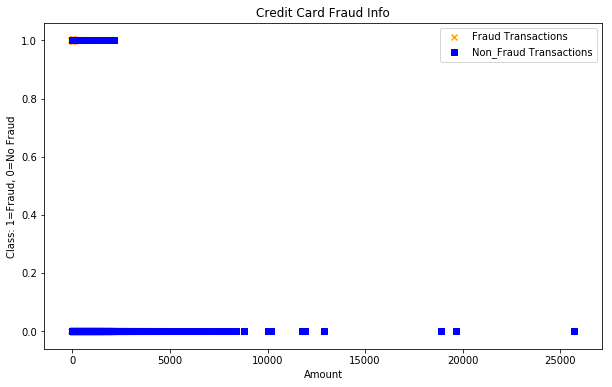

 3B- "Plot Histograms...Note that most independent variables are centered around 0" 



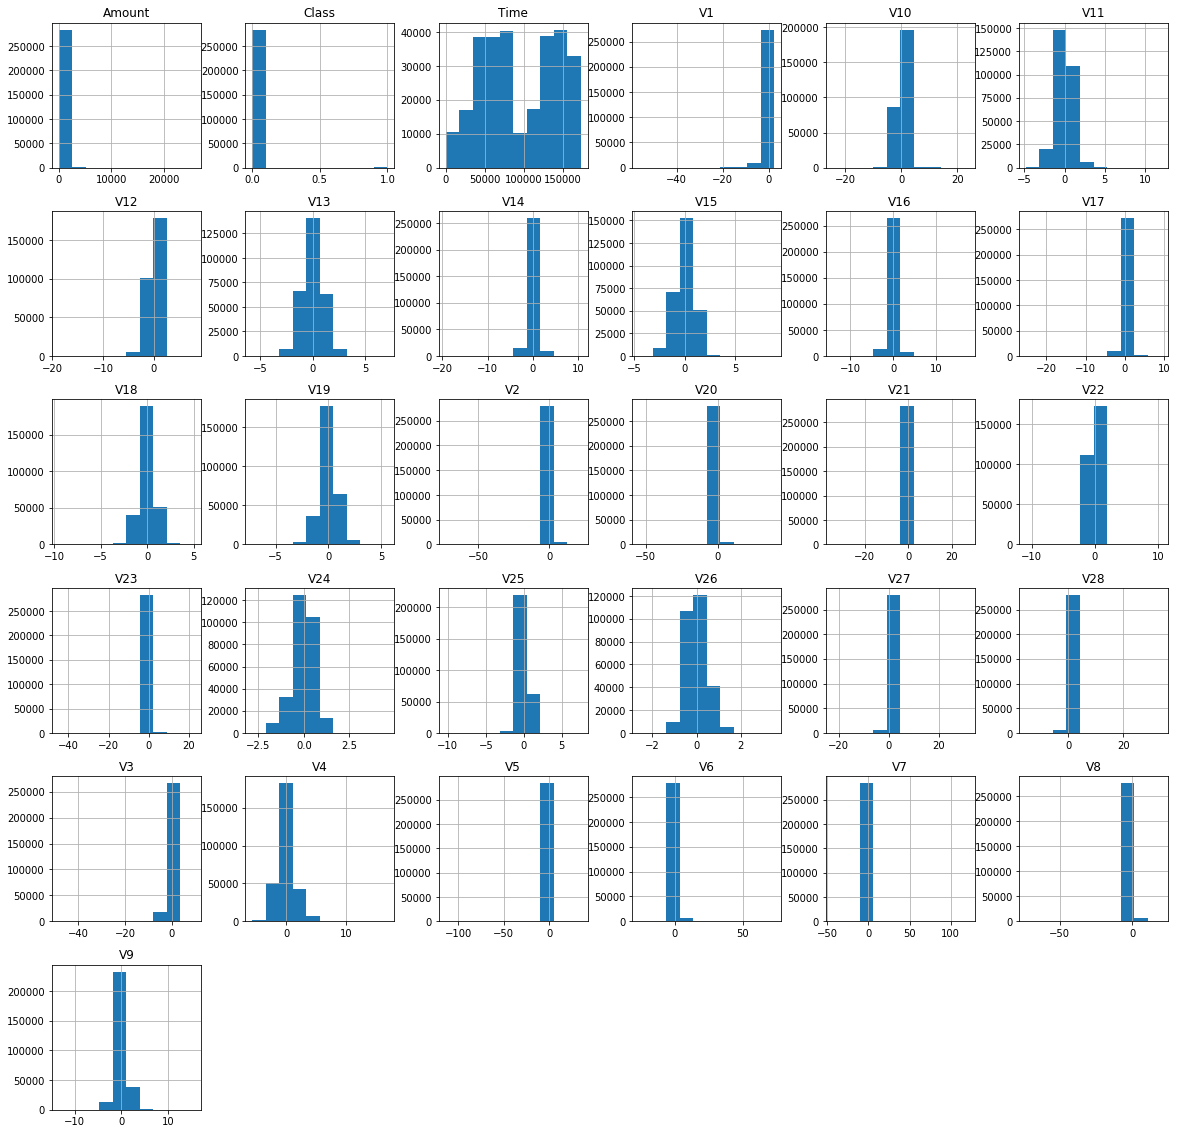

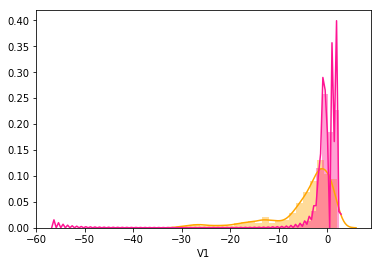

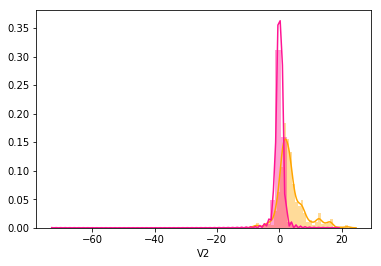

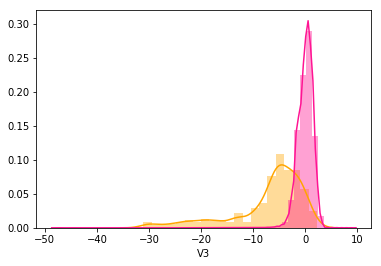

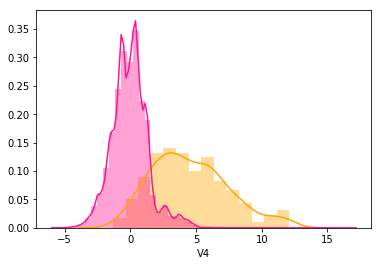

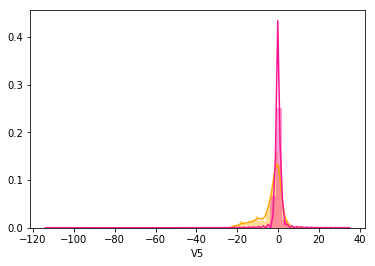

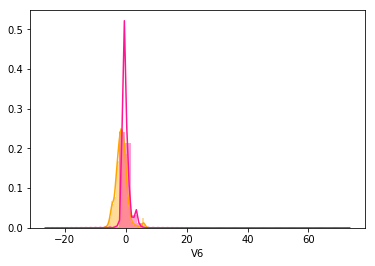

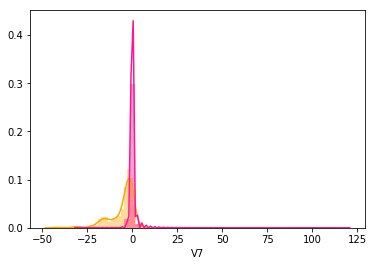

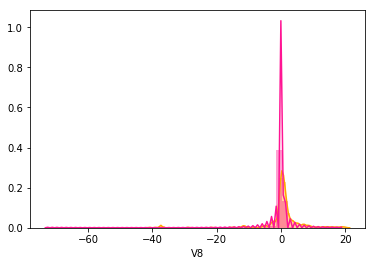

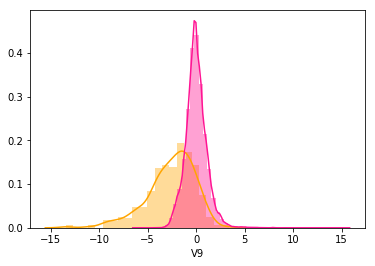

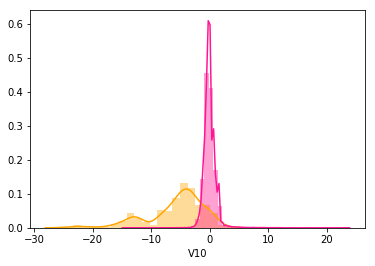

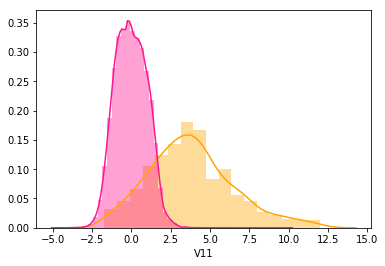

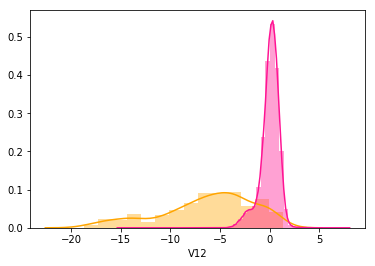

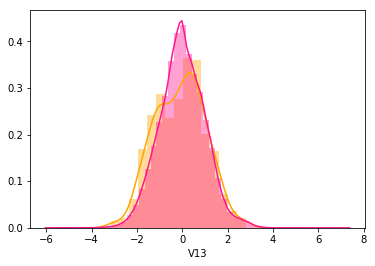

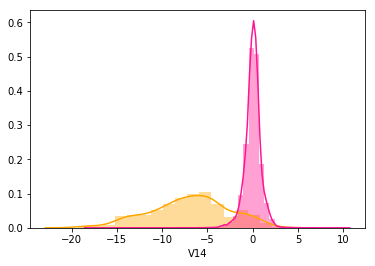

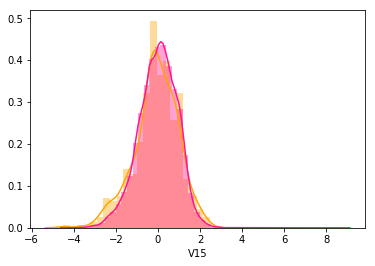

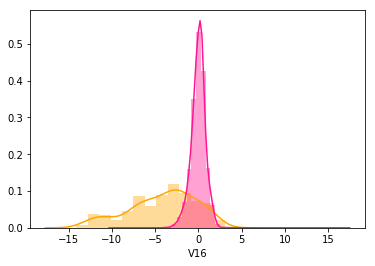

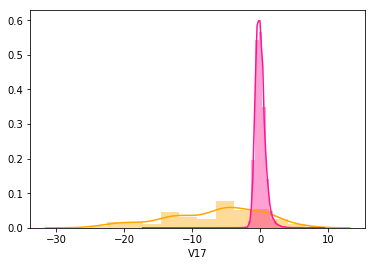

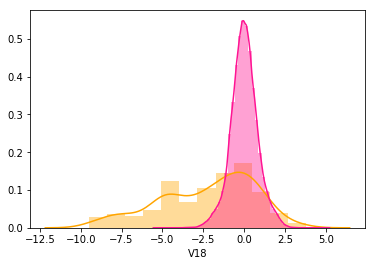

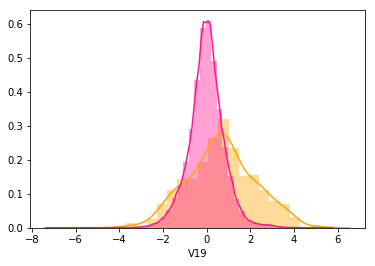

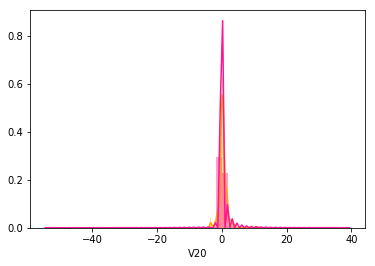

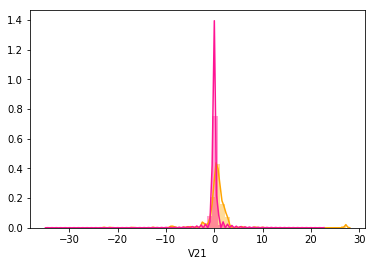

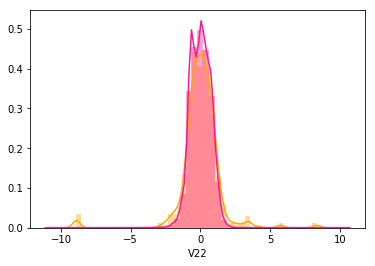

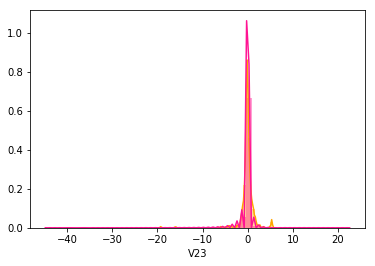

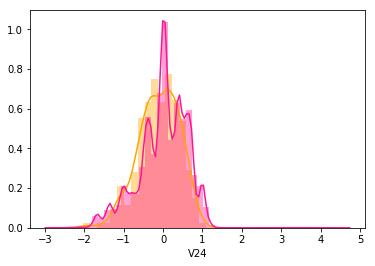

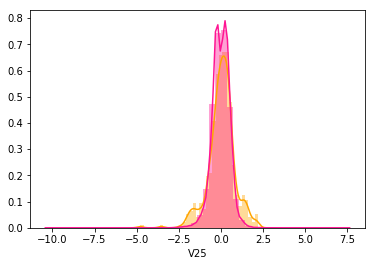

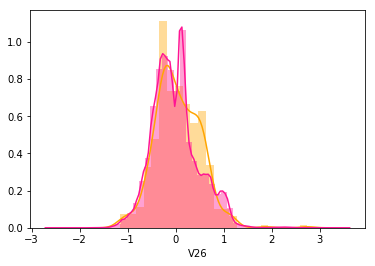

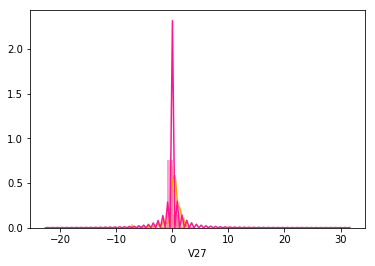

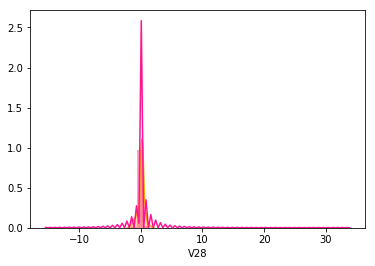

  4- Prepare Train and Test Data  

Total data size is : 284807
Training data size is 65.0% : 185125
Test data size is 35.0% : 99682


  5- Starting Logistic Regression  

 5A- Evaluate Logistic Regression with Precision, Recall, F1-score in Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99517
           1       0.78      0.51      0.61       166

   micro avg       1.00      1.00      1.00     99683
   macro avg       0.89      0.75      0.81     99683
weighted avg       1.00      1.00      1.00     99683



 5B- Logistic Regression Intercepts and Coefficients 

  Intercepts:  [-1.7507512653723882]
  Coeficiencts:  [array([-6.55814048e-05,  3.85843259e-01, -4.87791509e-01, -7.55022432e-01,
        7.25900953e-02,  1.91746326e-02, -2.54983649e-02,  3.79613067e-01,
       -4.23831047e-01, -3.61316369e-01, -1.58384794e-01, -3.52457959e-01,
        5.60523882e-02, -3.05708087e-01, -6.03302238e-01, -4.74655873e-

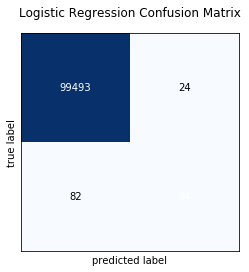

 5D-  Logistic Regression Accuracy 

 The Logistic Regression Accuracy Score is 0.9989366291142923



 Note: While Logistic Regression Accuracy score is high, its Confusion Matrix is showing incorrect 
 (false positives+false negatives) predictions. We should try other models like Random Forest to compare. 


  6- Starting Random Forest Analysis  

 6A- Random Forest Confusion Matrix 

[[99510     7]
 [   27   139]]




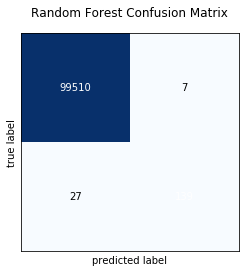

 6B-  Random Forest Accuracy 

 The Random Forest Accuracy Score is 0.9996589187725089

 Note: While Accuracy score of both Random Forest and Logistic Regression are high, Random Forest Confusion Matrix is showing 
 more correct predictions and less incorrect (false positives+false negatives) predictions than Logistics Regression confusion matrix 




In [24]:
# Homework-3 Credit Card Data Fraud Analsysis
# Read the credit card csv file 
# Review, Explore and Analyze Aspects of Credit Card Data
# Plot/Visualize the dataset independent/dependent variables
# Prepare Train and Test Data for the Machine learning Model
# Perform Machine Learning using Logistic Regression and Random Forest
# Train and Test the model and show model scores/performance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random
import seaborn as sns
import datetime
import sklearn
import missingno as msno
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

############################ Get the data from .csv ###########################################################

# Read the credit card csv file into dataframe; 
# By default, low_memory is True when loading data into memory and processes the file in chunks while parsing
print ('\033[1m \033[4mStep 1- Read Kaggle Credit Card .CSV File Data into Dataframe\033[0m' + "\n")
df_Card = pd.read_csv(r'creditcard.csv', low_memory=False)

############################# Review, Explore and Analyze Aspects of Credit Card Data ################################## 
# Print Kaggle credit card records; Note that out of 30 columns of independent data, only 2 columns are named/defined;   
# The remaining column are masked/hidden through principal component analysis (dimensionality reduction) 
# First column is for 'Time' (seconds between the transactions) and 2nd last column is for 'Amount' (Transaction amount)
# Last columns is the dependent variable and denotes 'Count' (0=No Fraud, 1=Fraud)

print ('\x1b[43m \033[1m \033[4mStep 2- Review, Explore and Analyze Credit Card Data \033[0m \x1b[0m' + "\n")
print ('\033[1m \033[4m2A- Print Dataframe Header Data \033[0m' + "\n")
print(df_Card.head())
print("\n")

# Lets find total number of columns and rows of credit card data
print('\033[1m Total Number of Rows and columns in Credit Card Data: \033[0m {}'.format(df_Card.shape))
print ('\033[1m Note: There are 30 Independent Variables and 1 Dependent Variable - Class (Boolean, 1-Fraud/0-No Fraud) \033[0m')
print ('\033[1m Independent Variables in Colunm 1-28 are masked/hidden for privacy reasons \033[0m')
print("\n")

# Explore the 'Class' column ('Class'= 1-Fraud/0-No Fraud) 
print ('\033[1m \033[4m2B- Show Fraud and Non Fraud Record Details: Class 1=Fraud, 0=No Fraud \033[0m' + "\n")

# lets check the 'class' column to see how many credit card data records are fraud and non-fraud
fraud = df_Card.loc[df_Card['Class'] == 1]
fraud_indices = df_Card[df_Card.Class == 1].index
non_fraud = df_Card.loc[df_Card['Class'] == 0]
non_fraud_indices = df_Card[df_Card.Class == 0].index
print('Number of Fraud Records : {}'.format(len(fraud)))
print('Number of Nonfraud Records : {}'.format(len(non_fraud)))
print('Note that the Number of Fraudulant Transactions are quite Small relative to Total credit card tTransactions')
print('\n')
print('Fraud Record Indices : {}'.format(fraud_indices))
print('\n')
print('Nonfraud Record indices {}'.format(non_fraud_indices))
print('\n')

# Use describe function to get further insight and view each independent/dependent variable's mean, std, min, max, percentile etc. 
print ('\033[1m \033[4m2C- Show Statistical Details About Independent and Dependent Variables\033[0m' + "\n")
print(df_Card.describe())
print("\n")

# Use info() function to get insight into info (count, non-null, type (float/int) of each independent/dependent variable
print ('\033[1m \033[4m2D- Show Credit Card Data Info for Each Column or Dependent/Independent Variables\033[0m' + "\n")
print(df_Card.info())
print("\n")

# Check for total number of missing or null values in each column
print ('\033[1m \033[4m2E- Show Total Number of Null Values in Each Column\033[0m' + "\n")
print(df_Card.isnull().sum())
print("\n" + 'No Null Values Found' + "\n")

############################# Plot/Visualize the dataset independent/dependent variables  ############################## 

print ('\x1b[43m \033[1m \033[4m3- Plot Credit Card Data \033[0m \x1b[0m' + "\n")

# Visualize the dataframe with no missing value.
print ('\033[1m \033[4m3A- Visualize the Dataframe With No Missing Values \033[0m')
msno.matrix(df_Card) 
plt.show()
print('\n')

# Plots ot show that fruad cases are for smaller amount transactions 
print('\033[1m \033[4m3B- Note: Fraud Transactions are centered around Lower Amount Transactions under 3000 \033[0m' + "\n")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
Fraud_Amt = df_Card[df_Card["Class"]==1].Amount
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.title('Fraud Transacations')
Fraud_Amt.hist(figsize=(10,6))
plt.subplot(1,2,2)
plt.xlabel('Transaction Amount')
plt.title('Non Fraud Transacations')
Non_Fraud_Amt = df_Card[df_Card["Class"]==0].Amount
Non_Fraud_Amt.hist(figsize=(10,6))
plt.show()

# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(x=df_Card['Amount'], y=df_Card['Class'], marker='x', color='Orange', label='Fraud Transactions')
plt.scatter(x=df_Card['Amount'], y=df_Card['Class'], marker='s', color='blue', label='Non_Fraud Transactions')
plt.legend(loc='upper right')
plt.title('Credit Card Fraud Info')
plt.xlabel('Amount')
plt.ylabel('Class: 1=Fraud, 0=No Fraud')
plt.show()

# Plot the Histograms for each independent/dependent variable 
print('\033[1m \033[4m3B- "Plot Histograms...Note that most independent variables are centered around 0" \033[0m' + "\n")
df_Card.hist(figsize=(20,20))
plt.show()

# Plot the Histograms for each independent variable (V1...V28) against dependent variable class (fraud and non fraud)
for i in range(1,29):
    plt.subplot()
    sns.distplot( df_Card.iloc[:,i][df_Card.Class == 1] , color="orange", label="Fraud")
    sns.distplot( df_Card.iloc[:,i][df_Card.Class == 0] , color="deeppink", label="Non Fraud")
    plt.show()

############################# Prepare Train and Test Data for the Machine learning Model ############################## 

print ('\x1b[43m \033[1m \033[4m4- Prepare Train and Test Data \033[0m \x1b[0m' '\n')

# Create X (independent variables) and y (dependent variable that we are trying to predict, Class column) data sets for logistic regression 
X_carddata = df_Card.iloc[:,:-1]
y_classdata = df_Card.iloc[:,-1]

# StandardScaler function helps standardize the data into same scale and distribution for machine learning
scaler = StandardScaler()
scaler.fit(X_carddata)

# Divide the data set into training data and test data 65/35 split using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_carddata_train, X_carddata_test, y_classdata_train, y_classdata_test = train_test_split(X_carddata, y_classdata, test_size=0.35)

print('Total data size is : {}'.format(len(df_Card)))
#Keep 65% data for training
train_size = 0.65
test_size = 1 - train_size
print('Training data size is ' + str(train_size*100) + '% : ' + '{}'.format(int(round(train_size * len(df_Card)))))
#Keep 35% data for testing
print('Test data size is ' + str((1-train_size)*100) + '% : ' + '{}'.format(int(round((len(df_Card)*(1 - train_size))))))
print('\n')

##################### Logistic Regression To Train and Test ##################################################################### 
# Use Logistic regression (predictive analysis) to find dependent binary variable (Fraud/No fraud) from independent variables.
# Logistic regression to predict the probability of a categorical dependent variable 

print ('\x1b[43m \033[1m \033[4m5- Starting Logistic Regression \033[0m \x1b[0m' '\n')

# Create Logistic Regression Estimator/Model Object for training, testing/prediction
# Use C is inverse of cross regularization parameter for principal component analysis (PCA) or dimensionality reduction 
# C=100000 so we are not overfitting on our trained dataset
Card_LogisticReg = linear_model.LogisticRegression(C=100000)

# Train the Logistic Regression model using training set
Card_LogisticReg_Result = Card_LogisticReg.fit(X_carddata_train, y_classdata_train)

# Test to predict with this model using training data 
y_Training_Predictions = Card_LogisticReg.predict(X_carddata_train)

# Test to predict with this model using test data
y_Test_Predictions = Card_LogisticReg.predict(X_carddata_test)

# Combine the training and testing predictions; Joining the two arrays along axis 0
y_All_Predictions = np.concatenate((y_Training_Predictions, y_Test_Predictions), axis=0)

# Generate the classification report to qualify the quality of predictions
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_test.

print('\033[1m \033[4m5A- Evaluate Logistic Regression with Precision, Recall, F1-score in Classification Report\033[0m' '\n')
print(classification_report(y_classdata_test, y_Test_Predictions))
print('\n')

# calculate the Intercepts and coefficients 
print('\033[1m \033[4m5B- Logistic Regression Intercepts and Coefficients \033[0m' '\n')
print ('  Intercepts: ', list(Card_LogisticReg.intercept_))
print ('  Coeficiencts: ', list(Card_LogisticReg.coef_))
print('\n')

# calculate and plot the Confusion Matrix
print('\033[1m \033[4m5C- Logistic Regression Confusion Matrix \033[0m' '\n')
CM = confusion_matrix(y_classdata_test, y_Test_Predictions.round())
print(CM)
print('\n')
plot_confusion_matrix(conf_mat=CM, figsize=(5,4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Use the score method to evaluate the trained model 
LogisticReg_Accuracy_Score = Card_LogisticReg.score(X_carddata_test, y_classdata_test)
print('\033[1m \033[4m5D-  Logistic Regression Accuracy \033[0m'  '\n')
print(' The Logistic Regression Accuracy Score is ' + str(LogisticReg_Accuracy_Score) + '\n') 
print('\n')

# Evaluate Outcome
print('\033[1m Note: While Logistic Regression Accuracy score is high, its Confusion Matrix is showing incorrect \033[0;0m')
print('\033[1m (false positives+false negatives) predictions. We should try other models like Random Forest to compare. \033[0;0m')
print('\n')
##################### Random Forest  To Train and Test ################################################################## 
# Use Random Forest to for fraud analysis 
#Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble.
#Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction

print ('\x1b[43m \033[1m \033[4m6- Starting Random Forest Analysis \033[0m \x1b[0m' '\n')

# Create Logistic Regression Estimator/Model Object for training, testing/prediction
Card_RandomFrst = ensemble.RandomForestClassifier(n_estimators=100)

# Train the Logistic Regression model using training set
Card_RandomFrst.fit(X_carddata_train, y_classdata_train)

# Test to predict with this model using training data 
y_Training_Predictions = Card_RandomFrst.predict(X_carddata_train)

# Test to predict with this model using test data
y_Test_Predictions = Card_RandomFrst.predict(X_carddata_test)

# Combine the training and testing predictions; Joining the two arrays along axis 0
y_All_Predictions = np.concatenate((y_Training_Predictions, y_Test_Predictions), axis=0)

# calculate the Confusion Matrix
print('\033[1m \033[4m6A- Random Forest Confusion Matrix \033[0m' '\n')
CM = confusion_matrix(y_classdata_test, y_Test_Predictions.round())
print(CM)
print('\n')
plot_confusion_matrix(conf_mat=CM, figsize=(5,4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Use the score method to evaluate the model 
Card_RandomFrst_Accuracy_Score = Card_RandomFrst.score(X_carddata_test, y_classdata_test)
print('\033[1m \033[4m6B-  Random Forest Accuracy \033[0m'  '\n')
print(' The Random Forest Accuracy Score is ' + str(Card_RandomFrst_Accuracy_Score) + '\n')

# Evaluate Outcome
print('\033[1m Note: While Accuracy score of both Random Forest and Logistic Regression are high, Random Forest Confusion Matrix is showing \033[0m')
print('\033[1m more correct predictions and less incorrect (false positives+false negatives) predictions than Logistics Regression confusion matrix \033[0m')
print('\n')